In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

## Q1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df_1 = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)

In [3]:
print(df_1.head())
print(df_1.tail())

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64
YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64


In [4]:
df_2 = pd.read_csv("Rose.csv")

In [5]:
date = pd.date_range(start='1/1/1980', end='1/7/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-03-31', '1994-04-30', '1994-05-31', '1994-06-30',
               '1994-07-31', '1994-08-31', '1994-09-30', '1994-10-31',
               '1994-11-30', '1994-12-31'],
              dtype='datetime64[ns]', length=180, freq='M')

In [6]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_2.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [7]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [8]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [9]:
df.tail(5)

,Rose
Time_Stamp,
NaT,45.0
NaT,52.0
NaT,28.0
NaT,40.0
NaT,62.0


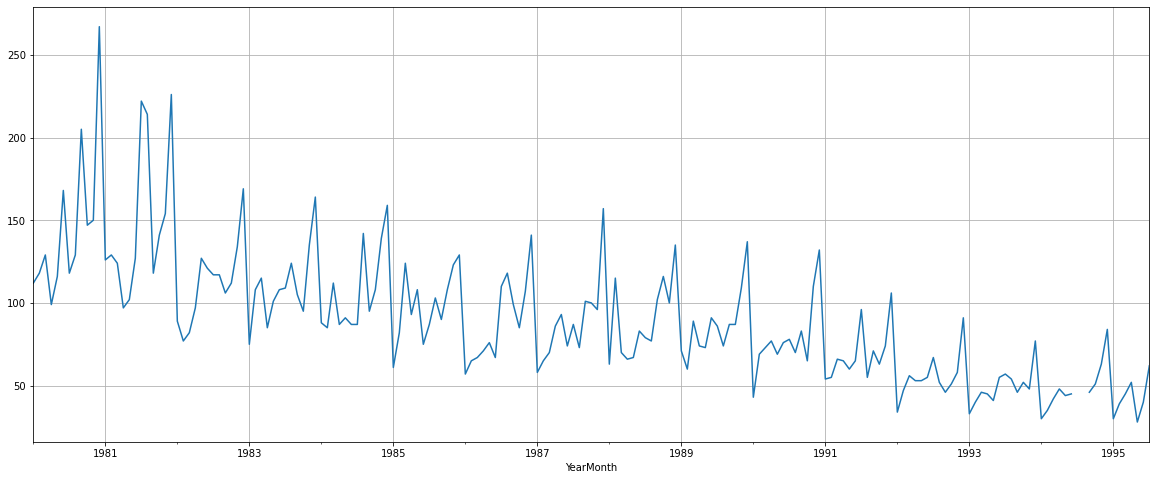

In [10]:
df_1.plot(figsize=(20,8))
plt.grid();

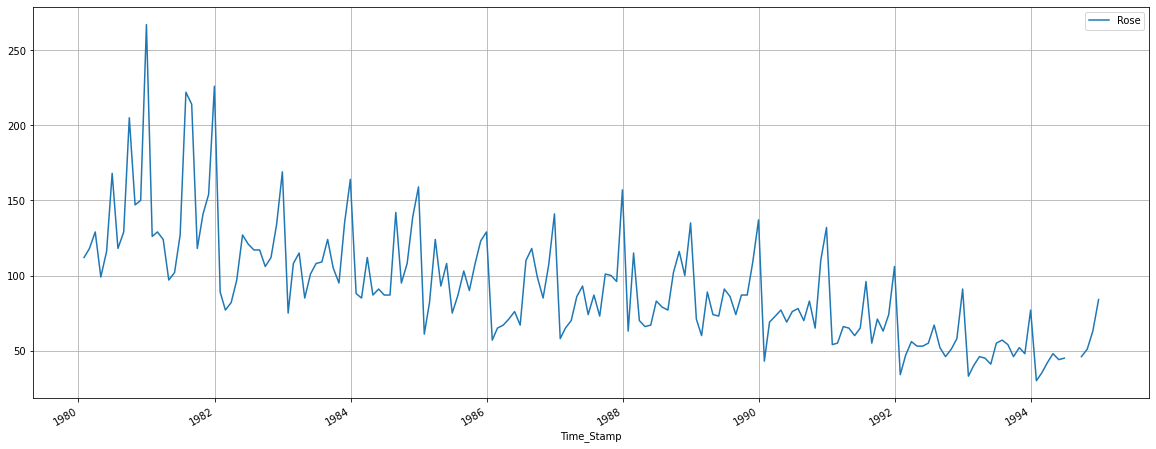

In [11]:
df.plot(figsize=(20,8))
plt.grid()

## Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [12]:
round(df_1.describe(),3)

count    185.000
mean      90.395
std       39.175
min       28.000
25%       63.000
50%       86.000
75%      112.000
max      267.000
Name: Rose, dtype: float64

In [13]:
df.isna().sum()

Rose    2
dtype: int64

In [14]:
missing_value = df[df.isnull().any(axis=1)]

In [15]:
missing_value

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


#### Impute the missing values and create a dataframe rdf

In [16]:
from     pandas                   import read_csv
# from     pandas                   import datetime #this particular submodule from pandas will be deprecated in future
# versions, thus the next line of code
from     datetime                 import datetime
import matplotlib.pyplot as         plt
import numpy                    as         np
def parser(x):
    return datetime.strptime(x, '%Y-%m')
 
series = read_csv('Rose.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
upsampled = series.resample('M').mean()
rdf = upsampled.interpolate(method='linear')
print(rdf.head(5))

YearMonth
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
Freq: M, Name: Rose, dtype: float64


In [17]:
rdf.tail(5)

YearMonth
1995-03-31    45.0
1995-04-30    52.0
1995-05-31    28.0
1995-06-30    40.0
1995-07-31    62.0
Freq: M, Name: Rose, dtype: float64

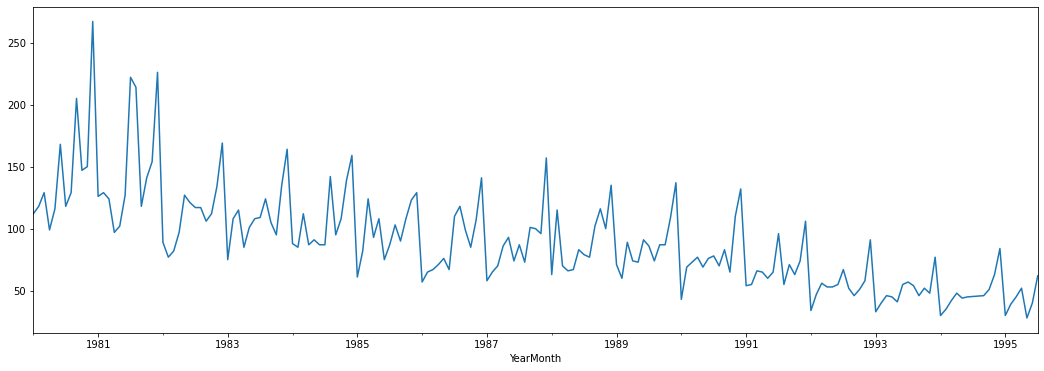

In [18]:
rdf.plot(figsize=(18,6))
plt.show()

In [19]:
print('Imputed value 1')
print(rdf['1994-07'].head(12))

print('Original value')
print(series['1994-07'].head(12))
      
print('Imputed value 2')
print(rdf['1994-08'].head(12))

print('Original value')
print(series['1994-08'].head(12))

Imputed value 1
YearMonth
1994-07-31    45.333333
Freq: M, Name: Rose, dtype: float64
Original value
YearMonth
1994-07-01   NaN
Name: Rose, dtype: float64
Imputed value 2
YearMonth
1994-08-31    45.666667
Freq: M, Name: Rose, dtype: float64
Original value
YearMonth
1994-08-01   NaN
Name: Rose, dtype: float64


In [20]:
rdf = pd.DataFrame(rdf)

In [21]:
round(rdf.describe(),3)

,Rose
count,187.000
mean,89.914
std,39.238
min,28.000
25%,62.500
50%,85.000
75%,111.000
max,267.000


In [22]:
rdf.isna().sum()

Rose    0
dtype: int64

In [23]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [24]:
rdf.shape

(187, 1)

### YEARLY BOXPLOT

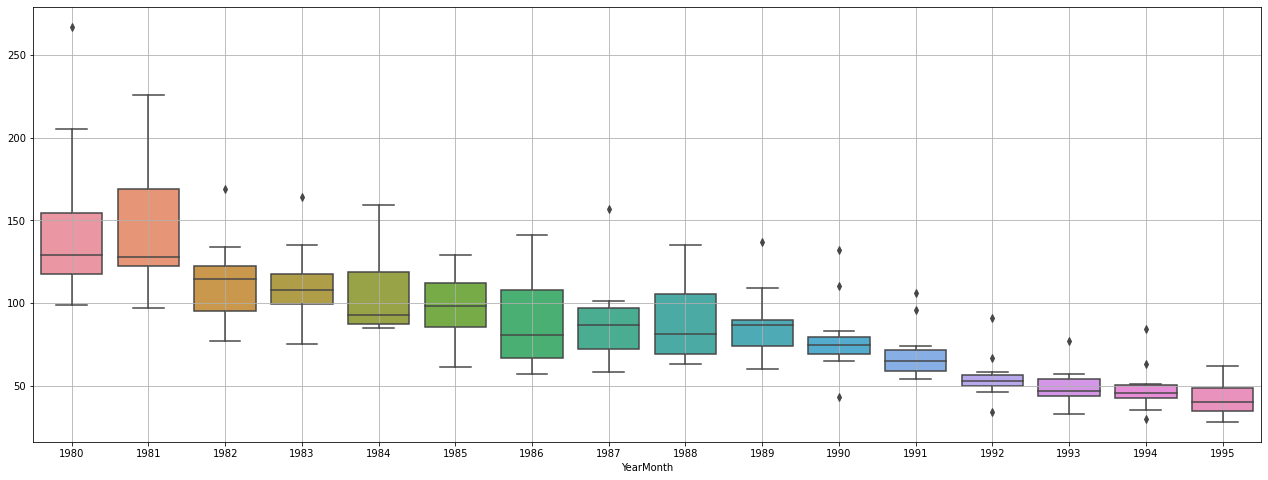

In [25]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rdf.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### MONTHLY BOXPLOT

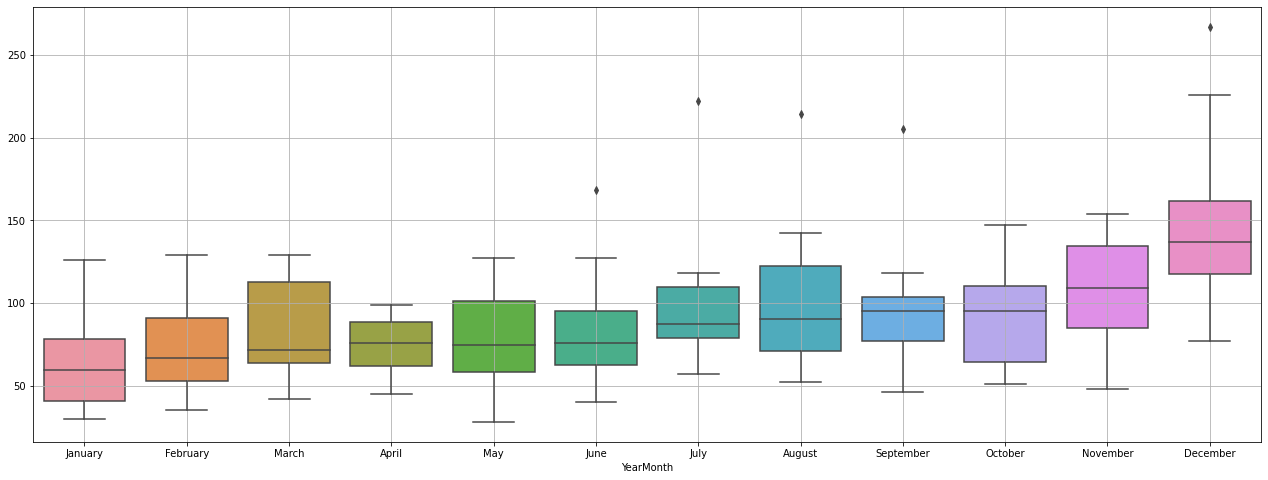

In [26]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rdf.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [27]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = rdf.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980.0,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981.0,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982.0,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983.0,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984.0,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985.0,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986.0,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987.0,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988.0,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


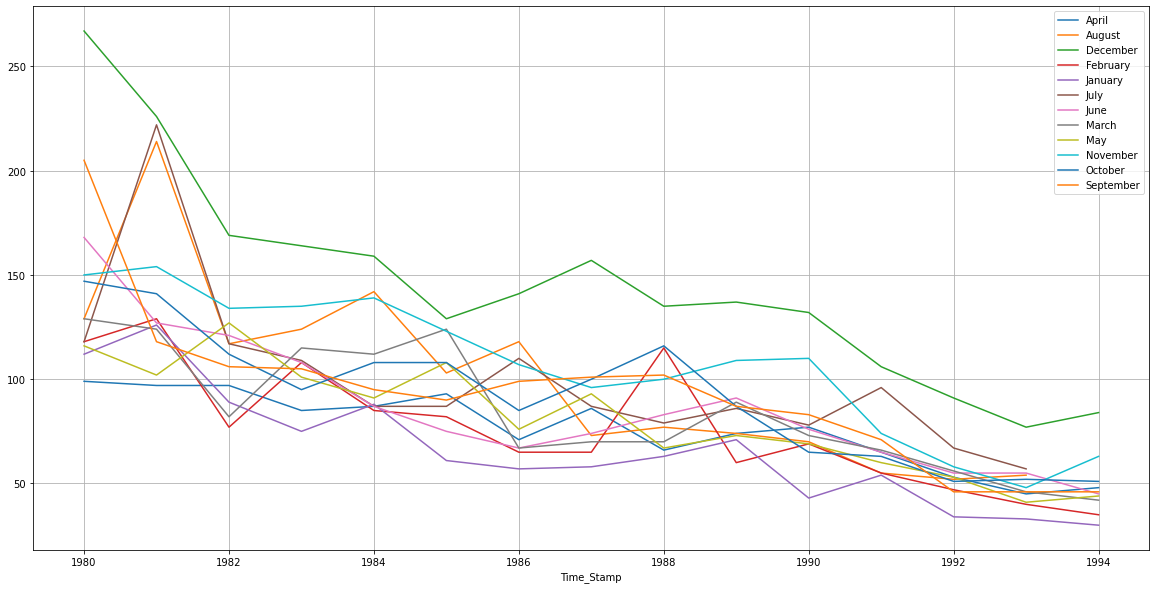

In [28]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Plot the Empirical Cumulative Distribution.

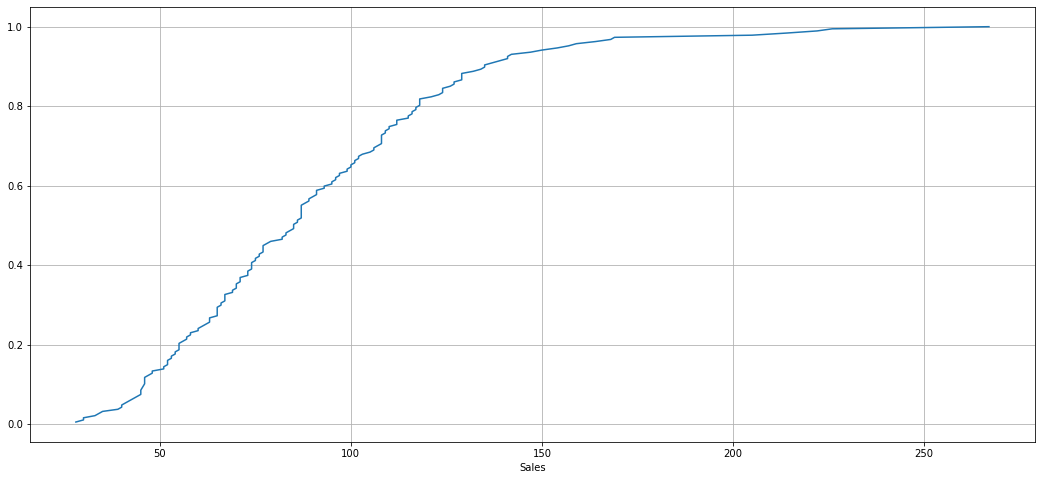

In [29]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(rdf['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

### Plot the average RetailSales per month and the month on month percentage change of RetailSales.

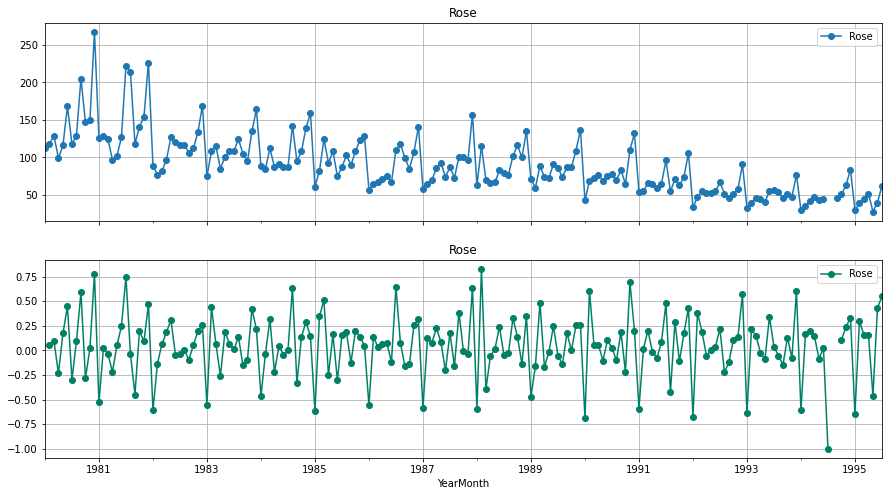

In [30]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(rdf.index)["Rose"].mean()
pct_change = df.groupby(rdf.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Rose",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose",grid=True)

### Decompose the Time Series and plot the different components.

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

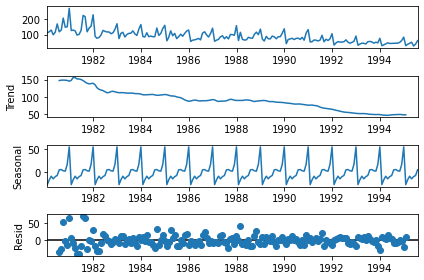

In [32]:
decomposition = seasonal_decompose(rdf,model='additive')
decomposition.plot();

In [33]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Freq: M, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980

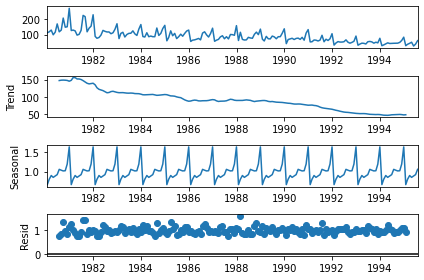

In [34]:
decomposition = seasonal_decompose(rdf,model='multipicative')
decomposition.plot();

In [35]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Freq: M, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Freq

## Q3. Split the data into training and test. The test data should start in 1991.

In [36]:
rdf.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

In [37]:
rdf.tail(5)

,Rose
YearMonth,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [38]:
# Drop the last year rows as data is incomplete ( only for 7 months data is provided)
rdf = rdf.head(-7)  
# Printing dataframe
rdf.tail()

,Rose
YearMonth,
1994-08-31,45.666667
1994-09-30,46.000000
1994-10-31,51.000000
1994-11-30,63.000000
1994-12-31,84.000000


In [39]:
train = rdf[rdf.index<'1991'] 
test = rdf[rdf.index>='1991']

In [40]:
print(train.shape)
print(test.shape)

(132, 1)
(48, 1)


In [41]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
                  Rose
YearMonth            
1994-08-31  45.666667
1994-09-30  46.000000
1994-10-31  51.000000
1994-11-30  63.000000
1994-12-31  84.000000 



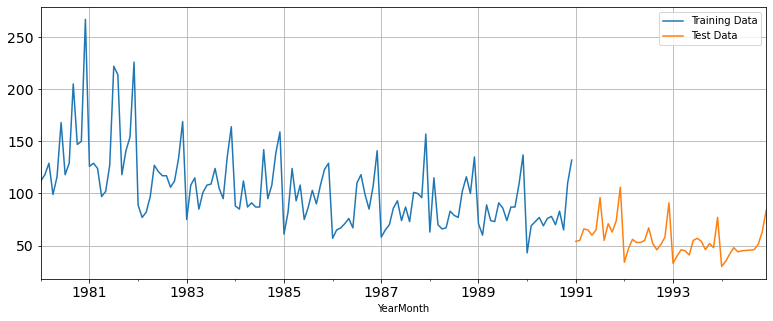

In [42]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Q4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [43]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [44]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [45]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
                  Rose  time
YearMonth                  
1994-08-31  45.666667   176
1994-09-30  46.000000   177
1994-10-31  51.000000   178
1994-11-30  63.000000   179
1994-12-31  84.000000   180 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

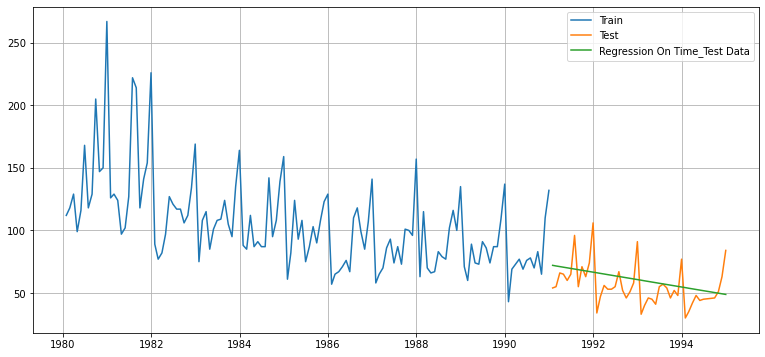

In [49]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [50]:
from sklearn import metrics

#### Model Evaluation

In [51]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.632


In [52]:
resultsDf_1 = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = resultsDf_1
resultsDf

,RMSE
RegressionOnTime,15.631542


### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [53]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [54]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Freq: M, Name: naive, dtype: float64

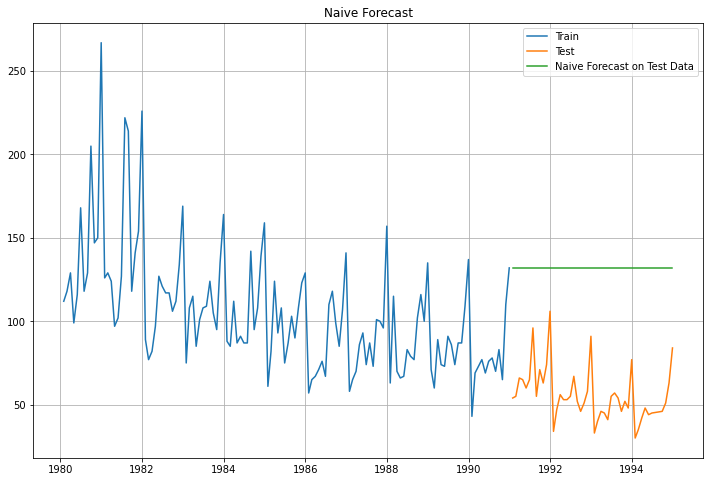

In [55]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [56]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.039


In [57]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE
RegressionOnTime,15.631542
NaiveModel,78.039461


### Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [58]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [59]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


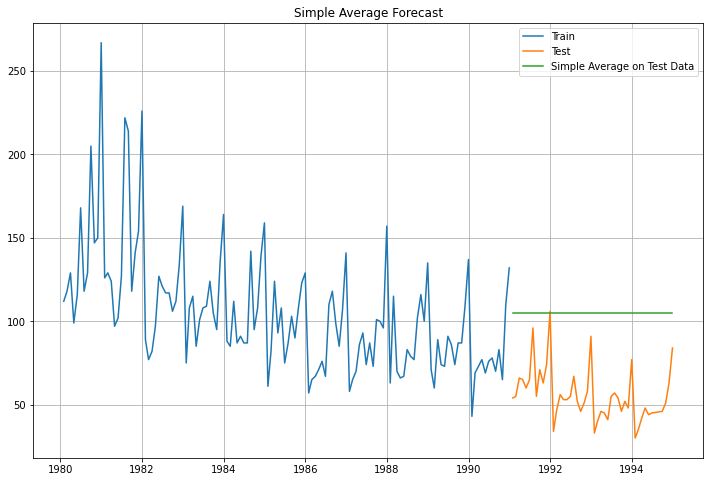

In [60]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [61]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 51.811


In [62]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE
RegressionOnTime,15.631542
NaiveModel,78.039461
SimpleAverageModel,51.811351


### MODEL 4: MOVING AVERAGE

In [63]:
MovingAverage = rdf.copy()
MovingAverage.tail()

,Rose
YearMonth,
1994-08-31,45.666667
1994-09-30,46.000000
1994-10-31,51.000000
1994-11-30,63.000000
1994-12-31,84.000000


In [64]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


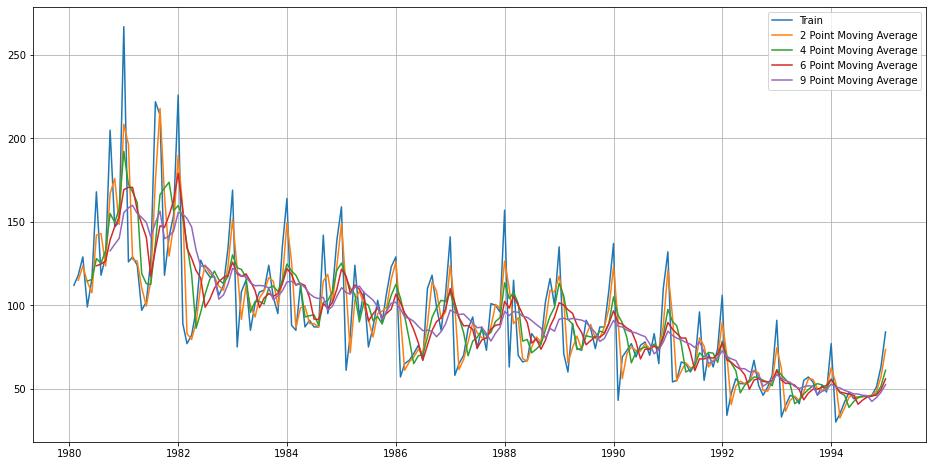

In [65]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [66]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.734)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.734):]

In [67]:
trailing_MovingAverage_train.tail(5)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1990-08-31,70.0,74.0,73.25,73.833333,76.888889
1990-09-30,83.0,76.5,76.75,75.500000,70.888889
1990-10-31,65.0,74.0,74.00,73.500000,73.333333
1990-11-30,110.0,87.5,82.00,80.333333,77.888889
1990-12-31,132.0,121.0,97.50,89.666667,84.444444


In [68]:
trailing_MovingAverage_test.head(5)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-01-31,54.0,93.0,90.25,85.666667,81.888889
1991-02-28,55.0,54.5,87.75,83.166667,80.333333
1991-03-31,66.0,60.5,76.75,80.333333,79.222222
1991-04-30,65.0,65.5,60.00,80.333333,77.777778
1991-05-31,60.0,62.5,61.50,72.000000,76.666667


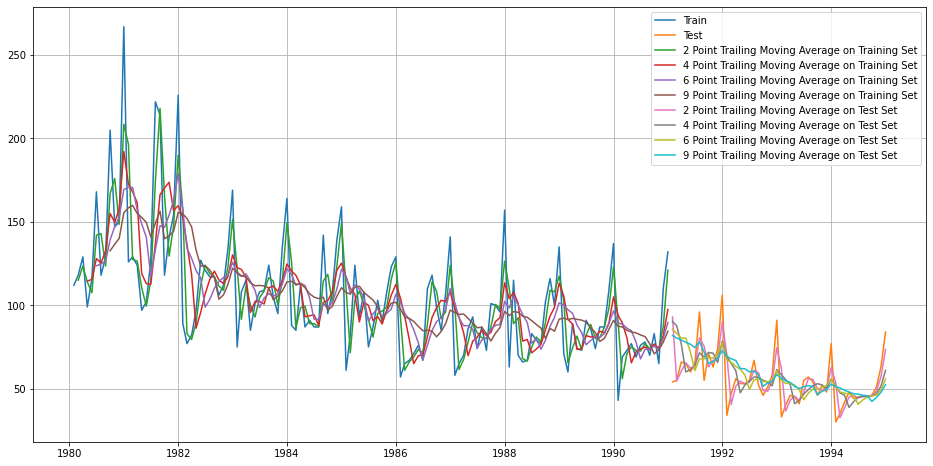

In [69]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [70]:
# Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.404
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.618
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.939 


In [71]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,RMSE
RegressionOnTime,15.631542
NaiveModel,78.039461
SimpleAverageModel,51.811351
2pointTrailingMovingAverage,11.401145
4pointTrailingMovingAverage,14.404177
6pointTrailingMovingAverage,14.617568
9pointTrailingMovingAverage,14.939436


### Before we go on to build the various Exponential Smoothing models,the models are plotted and compare the Time Series plots.

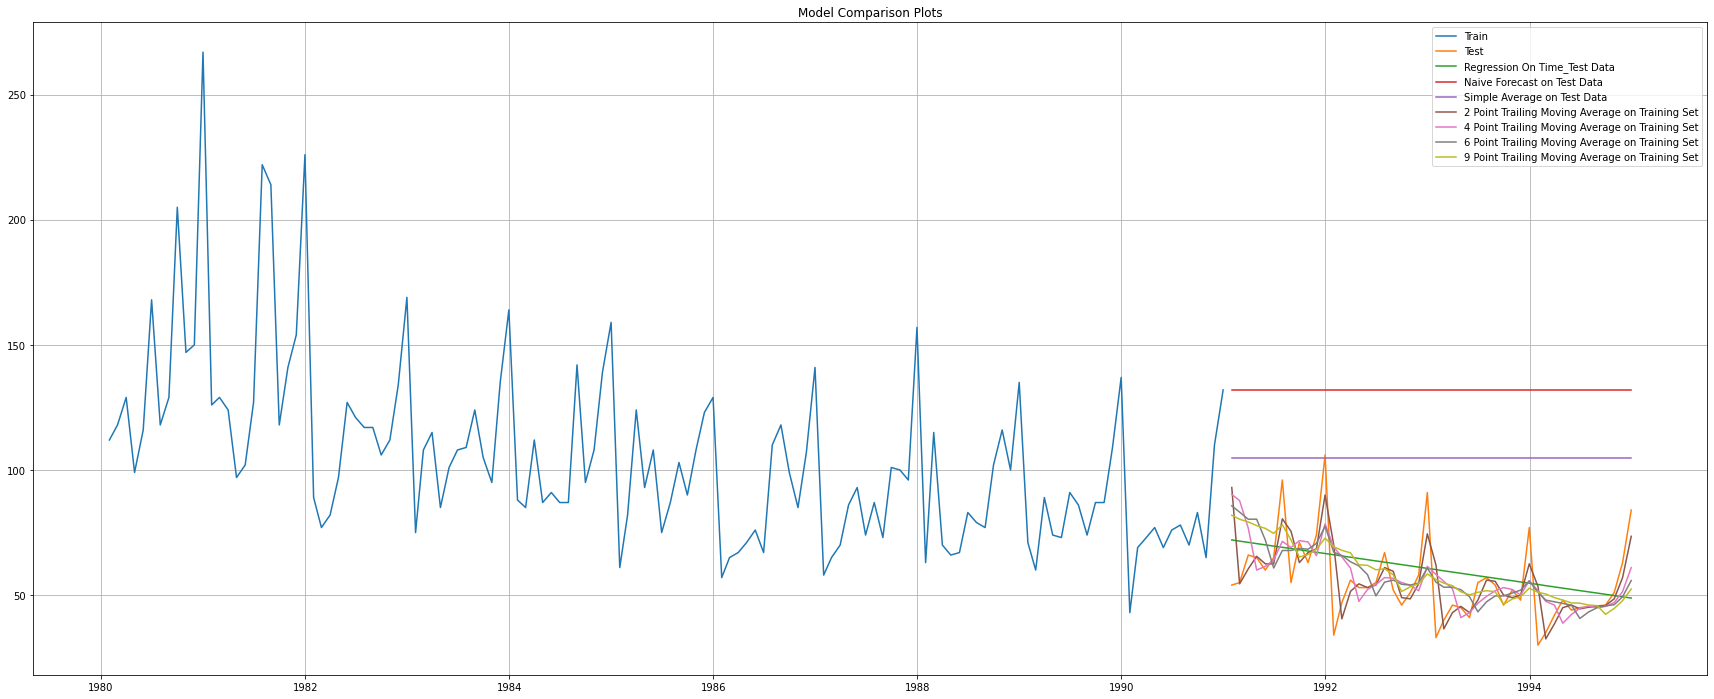

In [72]:
plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_9'], label='9 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Method 5: Simple Exponential Smoothing

In [73]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [74]:
SES_train = train.copy()
SES_test = test.copy()

In [75]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [76]:
model_SES_autofit = model_SES.fit(optimized=True)

In [77]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head(5)

,Rose,predict
YearMonth,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


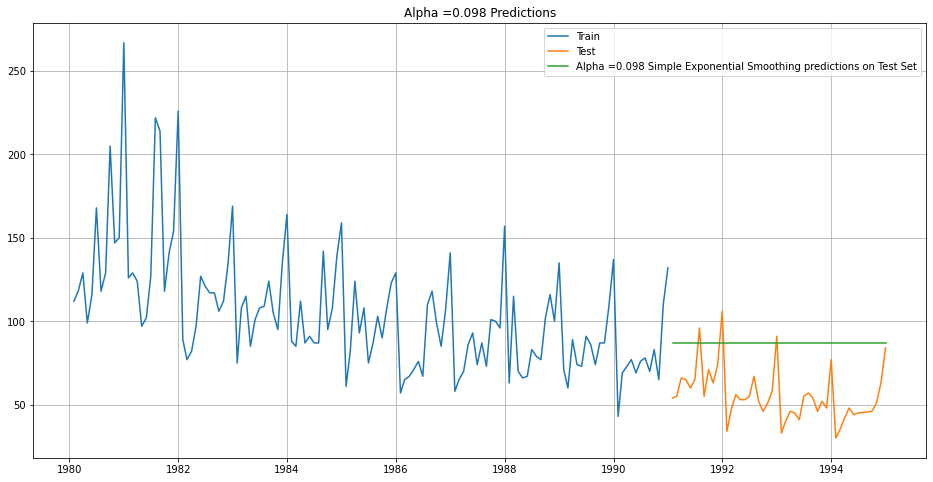

In [79]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

#### Model Evaluation for $\alpha$ = 0.098 : Simple Exponential Smoothing

In [80]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 35.221


In [81]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,RMSE
RegressionOnTime,15.631542
NaiveModel,78.039461
SimpleAverageModel,51.811351
2pointTrailingMovingAverage,11.401145
4pointTrailingMovingAverage,14.404177
6pointTrailingMovingAverage,14.617568
9pointTrailingMovingAverage,14.939436
"Alpha=0.098,SimpleExponentialSmoothing",35.221068


### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [82]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [83]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [84]:
## Let us check the parameters
model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 1.

In [85]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.104997
1991-02-28    87.104997
1991-03-31    87.104997
1991-04-30    87.104997
1991-05-31    87.104997
1991-06-30    87.104997
1991-07-31    87.104997
1991-08-31    87.104997
1991-09-30    87.104997
1991-10-31    87.104997
1991-11-30    87.104997
1991-12-31    87.104997
1992-01-31    87.104997
1992-02-29    87.104997
1992-03-31    87.104997
1992-04-30    87.104997
1992-05-31    87.104997
1992-06-30    87.104997
1992-07-31    87.104997
1992-08-31    87.104997
1992-09-30    87.104997
1992-10-31    87.104997
1992-11-30    87.104997
1992-12-31    87.104997
1993-01-31    87.104997
1993-02-28    87.104997
1993-03-31    87.104997
1993-04-30    87.104997
1993-05-31    87.104997
1993-06-30    87.104997
1993-07-31    87.104997
1993-08-31    87.104997
1993-09-30    87.104997
1993-10-31    87.104997
1993-11-30    87.104997
1993-12-31    87.104997
1994-01-31    87.104997
1994-02-28    87.104997
1994-03-31    87.104997
1994-04-30    87.104997
1994-05-31    87.104997
1994-06-30    87

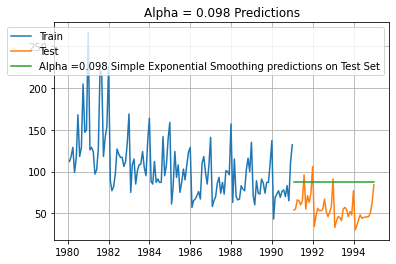

In [86]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions');

In [87]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [88]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 35.22108061789403
SES RMSE (calculated using statsmodels): 35.221080617894025


In [89]:
resultsDf_6 = pd.DataFrame({'RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,RMSE
RegressionOnTime,15.631542
NaiveModel,78.039461
SimpleAverageModel,51.811351
2pointTrailingMovingAverage,11.401145
4pointTrailingMovingAverage,14.404177
6pointTrailingMovingAverage,14.617568
9pointTrailingMovingAverage,14.939436
"Alpha=0.098,SimpleExponentialSmoothing",35.221068
"Alpha=0.99,SES",35.221081


### METHOD 6 : Holt - ETS(A, A, N) - Holt's linear method with additive errors

### Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [90]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [91]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    72.063238
1991-02-28    71.568859
1991-03-31    71.074481
1991-04-30    70.580103
1991-05-31    70.085725
1991-06-30    69.591347
1991-07-31    69.096969
1991-08-31    68.602590
1991-09-30    68.108212
1991-10-31    67.613834
1991-11-30    67.119456
1991-12-31    66.625078
1992-01-31    66.130699
1992-02-29    65.636321
1992-03-31    65.141943
1992-04-30    64.647565
1992-05-31    64.153187
1992-06-30    63.658808
1992-07-31    63.164430
1992-08-31    62.670052
1992-09-30    62.175674
1992-10-31    61.681296
1992-11-30    61.186918
1992-12-31    60.692539
1993-01-31    60.198161
1993-02-28    59.703783
1993-03-31    59.209405
1993-04-30    58.715027
1993-05-31    58.220648
1993-06-30    57.726270
1993-07-31    57.231892
1993-08-31    56.737514
1993-09-30    56.243136
1993-10-31    55.748757
1993-11-30    55.254379
1993-12-31    54.760001
1994-01-31    54.265623
1994-02-28    53.771245
1994-03-31    53.276866
1994-04-30    52.782488
1994-05-31    52.288110
1994-06-30    51

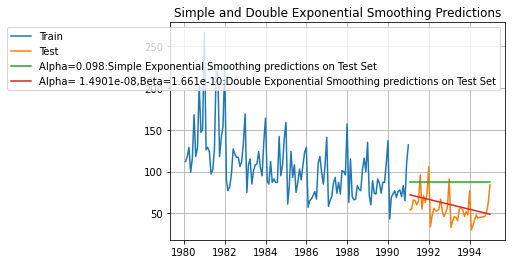

In [92]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha= 1.4901e-08,Beta=1.661e-10:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [93]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.631530872673833


In [94]:
resultsDf_7 = pd.DataFrame({'RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha= 1.4901e-08,Beta=1.661e-10:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,RMSE
RegressionOnTime,15.631542
NaiveModel,78.039461
SimpleAverageModel,51.811351
2pointTrailingMovingAverage,11.401145
4pointTrailingMovingAverage,14.404177
6pointTrailingMovingAverage,14.617568
9pointTrailingMovingAverage,14.939436
"Alpha=0.098,SimpleExponentialSmoothing",35.221068
"Alpha=0.99,SES",35.221081
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531


### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

### METHOD  7 : Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [95]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08872764725999983, 'smoothing_trend': 9.006425383910208e-06, 'smoothing_seasonal': 0.00030220468692033857, 'damping_trend': nan, 'initial_level': 146.86313344217183, 'initial_trend': -0.54920783338383, 'initial_seasons': array([-31.29615978, -18.85729122, -10.84129035, -21.39327001,
       -12.61174453,  -7.17892692,   2.72463253,   8.78522404,
         4.87498352,   3.01144155,  21.09509348,  63.26062685]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [96]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31     42.493878
1991-02-28     54.383286
1991-03-31     61.850018
1991-04-30     50.748583
1991-05-31     58.981025
1991-06-30     63.864702
1991-07-31     73.219078
1991-08-31     78.730554
1991-09-30     74.270845
1991-10-31     71.857980
1991-11-30     89.392486
1991-12-31    131.011001
1992-01-31     35.903382
1992-02-29     47.792789
1992-03-31     55.259522
1992-04-30     44.158086
1992-05-31     52.390528
1992-06-30     57.274205
1992-07-31     66.628582
1992-08-31     72.140058
1992-09-30     67.680349
1992-10-31     65.267484
1992-11-30     82.801990
1992-12-31    124.420505
1993-01-31     29.312885
1993-02-28     41.202293
1993-03-31     48.669026
1993-04-30     37.567590
1993-05-31     45.800032
1993-06-30     50.683709
1993-07-31     60.038085
1993-08-31     65.549561
1993-09-30     61.089852
1993-10-31     58.676987
1993-11-30     76.211493
1993-12-31    117.830009
1994-01-31     22.722389
1994-02-28     34.611797
1994-03-31     42.078529
1994-04-30     30.977093


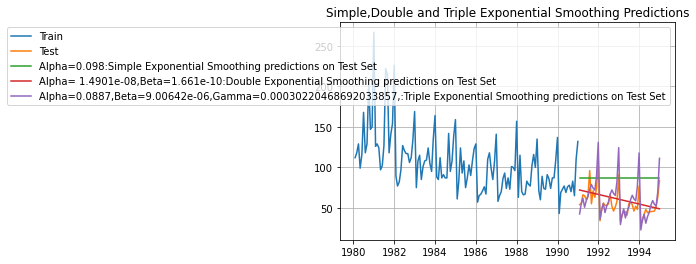

In [97]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha= 1.4901e-08,Beta=1.661e-10:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0887,Beta=9.00642e-06,Gamma=0.00030220468692033857,:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [98]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.255505858895798


In [99]:
resultsDf_8 = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.0887,Beta=9.00642e-06,Gamma=0.000302:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,RMSE
RegressionOnTime,15.631542
NaiveModel,78.039461
SimpleAverageModel,51.811351
2pointTrailingMovingAverage,11.401145
4pointTrailingMovingAverage,14.404177
6pointTrailingMovingAverage,14.617568
9pointTrailingMovingAverage,14.939436
"Alpha=0.098,SimpleExponentialSmoothing",35.221068
"Alpha=0.99,SES",35.221081
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531


### Inference

Triple Exponential Smoothing has performed the best on the test (better than DES) and RMSE is lesser for TES than Double Exponential smoothing (DES). The seasonality component played little role compared to trend. But the RMSE of the test set became quite low using Triple Exponential Smoothing(TES).

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

ETS(A, A, M) model

In [100]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07580378115501289, 'smoothing_trend': 0.04082731831671567, 'smoothing_seasonal': 0.0008792861232047841, 'damping_trend': nan, 'initial_level': 163.87796236599962, 'initial_trend': -0.9559811417358383, 'initial_seasons': array([0.68432572, 0.77587329, 0.84828062, 0.74119702, 0.83386517,
       0.90761668, 0.99838676, 1.06374484, 1.00486364, 0.9847888 ,
       1.14803087, 1.58276201]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [101]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31     56.036899
1991-02-28     63.349325
1991-03-31     69.021015
1991-04-30     60.120355
1991-05-31     67.380193
1991-06-30     73.053471
1991-07-31     80.089604
1991-08-31     85.028307
1991-09-30     80.074762
1991-10-31     78.207855
1991-11-30     90.863516
1991-12-31    124.781088
1992-01-31     53.763924
1992-02-29     60.771028
1992-03-31     66.202322
1992-04-30     57.656765
1992-05-31     64.609652
1992-06-30     70.039327
1992-07-31     76.773753
1992-08-31     81.495797
1992-09-30     76.736490
1992-10-31     74.936046
1992-11-30     87.048962
1992-12-31    119.524246
1993-01-31     51.490950
1993-02-28     58.192732
1993-03-31     63.383629
1993-04-30     55.193175
1993-05-31     61.839110
1993-06-30     67.025183
1993-07-31     73.457901
1993-08-31     77.963287
1993-09-30     73.398218
1993-10-31     71.664238
1993-11-30     83.234408
1993-12-31    114.267403
1994-01-31     49.217976
1994-02-28     55.614435
1994-03-31     60.564937
1994-04-30     52.729585


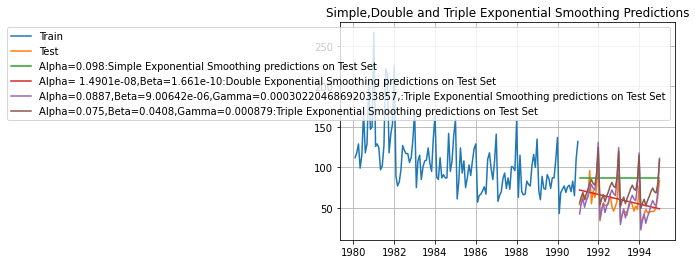

In [102]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha= 1.4901e-08,Beta=1.661e-10:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0887,Beta=9.00642e-06,Gamma=0.00030220468692033857,:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.075,Beta=0.0408,Gamma=0.000879:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [103]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 19.779589224348733


In [104]:
resultsDf_9 = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.075,Beta=0.0408,Gamma=0.000879:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,RMSE
RegressionOnTime,15.631542
NaiveModel,78.039461
SimpleAverageModel,51.811351
2pointTrailingMovingAverage,11.401145
4pointTrailingMovingAverage,14.404177
6pointTrailingMovingAverage,14.617568
9pointTrailingMovingAverage,14.939436
"Alpha=0.098,SimpleExponentialSmoothing",35.221068
"Alpha=0.99,SES",35.221081
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

## Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
### Note: Stationarity should be checked at alpha = 0.05

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [105]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [106]:
dftest = adfuller(rdf,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.226
DF test p-value is 0.47506276314247187
Number of lags used 13


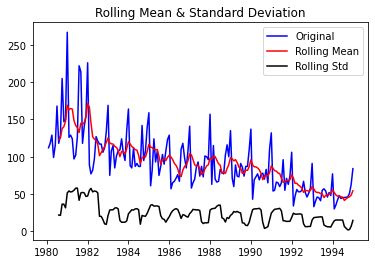

Results of Dickey-Fuller Test:
Test Statistic                  -1.737104
p-value                          0.412104
#Lags Used                      13.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64 



In [107]:
test_stationarity(rdf['Rose'].dropna())

We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [108]:
dftest = adfuller(rdf.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.890
DF test p-value is 1.282046171588298e-10
Number of lags used 12


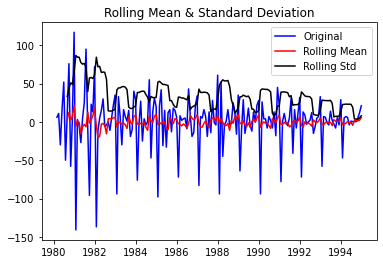

Results of Dickey-Fuller Test:
Test Statistic                -7.815416e+00
p-value                        6.891049e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.660000e+02
Critical Value (1%)           -3.470370e+00
Critical Value (5%)           -2.879114e+00
Critical Value (10%)          -2.576139e+00
dtype: float64 



In [109]:
test_stationarity(rdf['Rose'].diff().dropna())

Now, let us go ahead and plot the stationary series.

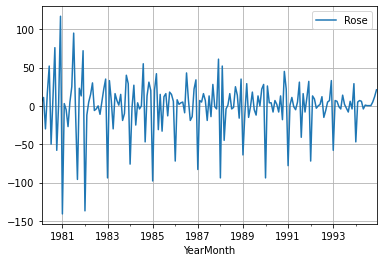

In [110]:
rdf.diff().dropna().plot(grid=True);

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [111]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

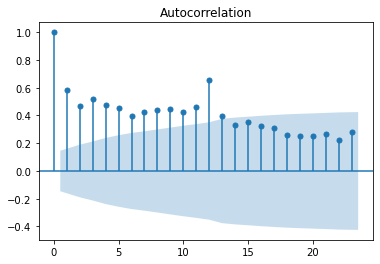

In [112]:
plot_acf(rdf,alpha=0.05); 

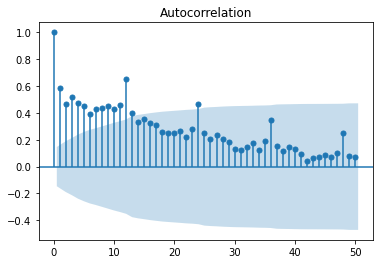

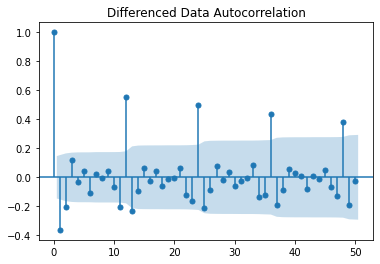

In [113]:
plot_acf(rdf['Rose'],lags=50)
plot_acf(rdf['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()  # p=2

From the above plots, we can say that there seems to be a seasonality in the data.

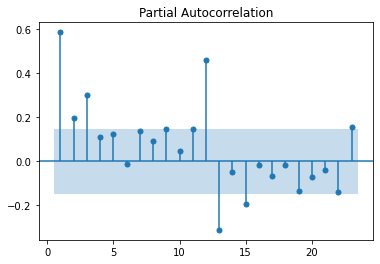

In [114]:
plot_pacf(rdf,zero=False,alpha=0.05); 

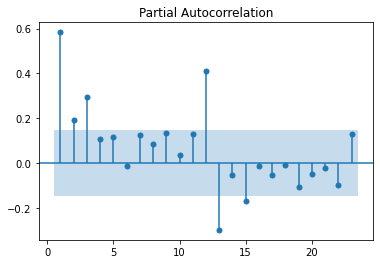

In [115]:
plot_pacf(rdf,zero=False,alpha=0.05,method='ywmle'); # p=1

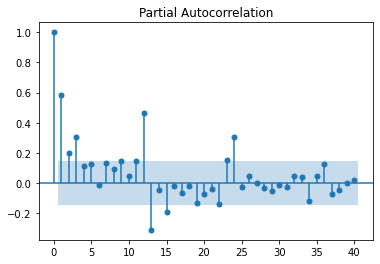

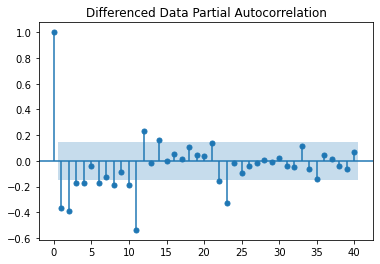

In [116]:
plot_pacf(rdf['Rose'],lags=40)
plot_pacf(rdf['Rose'].diff().dropna(),lags=40,title='Differenced Data Partial Autocorrelation')
plt.show() #q=4

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2018. Test Data is from the beginning of 2019 to the last time stamp provided.

In [117]:
rdf.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994],
           dtype='int64', name='YearMonth')

In [118]:
train = rdf[rdf.index<'1991'] 
test =rdf[rdf.index>='1991']

In [119]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [120]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
YearMonth,
1994-08-31,45.666667
1994-09-30,46.000000
1994-10-31,51.000000
1994-11-30,63.000000
1994-12-31,84.000000


In [121]:
print(train.shape)
print(test.shape)

(132, 1)
(48, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

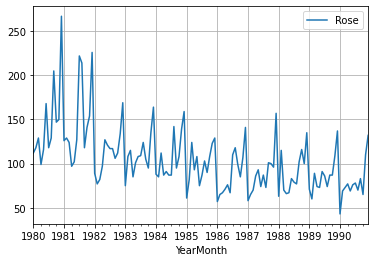

In [122]:
train.plot(grid=True);

In [123]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047063
Number of lags used 13


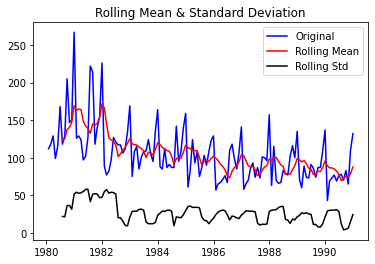

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [124]:
test_stationarity(train['Rose'])

The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [125]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.8948313567816136e-08
Number of lags used 12


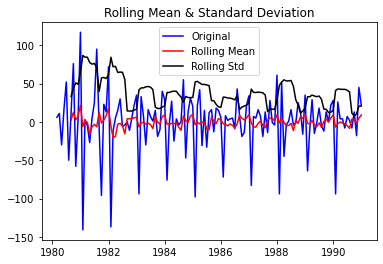

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [126]:
test_stationarity(train['Rose'].diff().dropna())

Now, let us go ahead and plot the differenced training data.

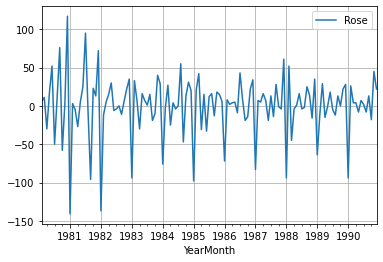

In [127]:
train.diff().dropna().plot(grid=True);

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [129]:
import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [130]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [131]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(0, 1, 3) - AIC:1280.5453761734655


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 4) - AIC:1281.676698214394
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223310003


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 4) - AIC:1279.6052625434186
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264284


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6949119626274


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 1, 4) - AIC:1278.772249045519
ARIMA(3, 1, 0) - AIC:1297.48109172717
ARIMA(3, 1, 1) - AIC:1282.4192776271977
ARIMA(3, 1, 2) - AIC:1283.720740597716


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) - AIC:1278.6588655941036
ARIMA(3, 1, 4) - AIC:1287.7190768443138
ARIMA(4, 1, 0) - AIC:1296.32665690046
ARIMA(4, 1, 1) - AIC:1283.7931715123075
ARIMA(4, 1, 2) - AIC:1285.7182485626197


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 3) - AIC:1278.4514105832604
ARIMA(4, 1, 4) - AIC:1282.3776177189604


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [132]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
13,"(2, 1, 3)",1274.694912
23,"(4, 1, 3)",1278.451411
18,"(3, 1, 3)",1278.658866
14,"(2, 1, 4)",1278.772249
9,"(1, 1, 4)",1279.605263


In [133]:
auto_ARIMA = ARIMA(train, order=(2,1,3), freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sun, 23 May 2021   AIC                           1274.695
Time:                        08:58:23   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.703      0.000      -0.893      -0.565
ma.L1          1.0450      0.685      1.527      0.1

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


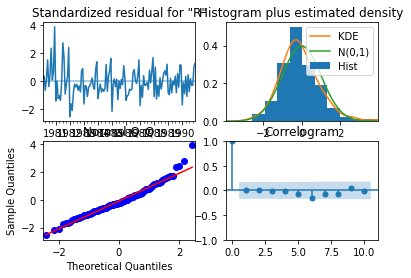

In [134]:
results_auto_ARIMA.plot_diagnostics();

### Predict on the Test Set using automated ARIMA model and evaluate the mode

In [135]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [136]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [137]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 35.2716865970044 
MAPE: 69.3742194305556


In [138]:
resultsDf_10= pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,15.631542,NaN,NaN
NaiveModel,78.039461,NaN,NaN
SimpleAverageModel,51.811351,NaN,NaN
2pointTrailingMovingAverage,11.401145,NaN,NaN
4pointTrailingMovingAverage,14.404177,NaN,NaN
6pointTrailingMovingAverage,14.617568,NaN,NaN
9pointTrailingMovingAverage,14.939436,NaN,NaN
"Alpha=0.098,SimpleExponentialSmoothing",35.221068,NaN,NaN
"Alpha=0.99,SES",35.221081,NaN,NaN
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531,NaN,NaN


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

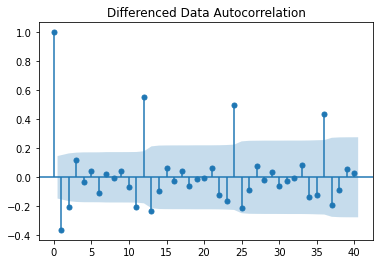

In [139]:
plot_acf(rdf['Rose'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plt.show()  #S=6 ,S=12 , q=2

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [140]:
import itertools
p = q = range(0, 4)
d= range(1,2) #order of differencing in ARIMA model
D = range(0,1) # don't want to stationarise seasonality in SARIMA
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [141]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [142]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.499626111386
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.707747182699
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625207
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149016
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721783
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.986174312437
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515017
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426205107
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206422593
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765140148
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.042505217112
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917090924679
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029548
SARIMA(0, 1, 1)x(0, 0, 2, 6) - A

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283234309286
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103228291145
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8723905326981
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457819334
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798944245
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2203679536137
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:961.0659787823239
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:975.6133308414527
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:977.0520552983687
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:962.9964593950339
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:962.7649535328244
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:1237.8702126608182
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:1174.1516821133323
SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1077.0677580069162
SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:995.7578093705499
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:1185.2892267184197
SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:1125.9720320164768
SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:1055.079085252924
SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:9

In [143]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744298
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582104
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205612
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951


In [144]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2,1,3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 23 May 2021   AIC                            951.744
Time:                                   09:00:47   BIC                            981.349
Sample:                                        0   HQIC                           963.750
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5026      0.083     -6.079      0.000      -0.665      -0.341
ar.L2         -0.6627      0.084     -7.916

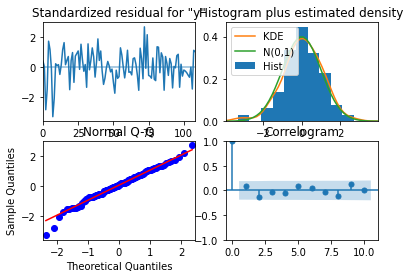

In [145]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using automated SARIMA (Seasonality=6) model and evaluate the model.

In [146]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [147]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,66.899372,16.350995,34.852011,98.946732
1,65.987488,16.482330,33.682716,98.292260
2,74.440188,16.588198,41.927916,106.952459
3,76.040736,16.710780,43.288209,108.793262
4,78.414519,16.711394,45.660788,111.168251


In [148]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 26.066520932441634 
MAPE: 50.55395222869912


In [149]:
resultsDf_12= pd.DataFrame({'Test RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,resultsDf_12])

resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,15.631542,NaN,NaN
NaiveModel,78.039461,NaN,NaN
SimpleAverageModel,51.811351,NaN,NaN
2pointTrailingMovingAverage,11.401145,NaN,NaN
4pointTrailingMovingAverage,14.404177,NaN,NaN
6pointTrailingMovingAverage,14.617568,NaN,NaN
9pointTrailingMovingAverage,14.939436,NaN,NaN
"Alpha=0.098,SimpleExponentialSmoothing",35.221068,NaN,NaN
"Alpha=0.99,SES",35.221081,NaN,NaN
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531,NaN,NaN


### Seasonality = 12 (Auto SARIMA)

In [150]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [151]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [152]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4620.270461546251
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753504
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3001.451859547566
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894562


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3825.0727815583987
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702637687
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128542


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3506.213452181075
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383859


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:4062.432568320479
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094527
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302789


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3718.620916180553
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988271349375


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3475.197712959759
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764801797
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844936083293
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269404402


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3508.2439683333064
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541054
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526487
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2995.603286311332
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413825
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933538035
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913587571
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3717.7114967843636
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257991
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545034917
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085680747


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3721.736733448757
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.102018937503
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080529609
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528369222


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3022.507177404176
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.950121673916
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646075988
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.692653338052


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3964.111036852745
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212216
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212935393
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340518
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3691.6056447848573
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987116
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996882174
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788252531


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3569.415018113366
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124792142
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772360103
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150722271089
SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3537.6571790084263
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585707
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257685


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3897.039485633808
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.408005502361
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972947882


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3262.9364483444133
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664119
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661069
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071218


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3111.9838445149994
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272566
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573531
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086853467


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3342.302711347493
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255505
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640957
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063864
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4168.023459327619
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031257
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135954
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428508104


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3732.743010890288
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060841146
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470805
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936803


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3557.917787006939
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439389992
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447834212
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850291048
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3563.2199465467197
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706292
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101045
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.493840263531


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4051.714817114274
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.776092785662
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211407576
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500516412
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3755.4221674978044
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196723837
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827897728
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.9030478809166


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3423.8013701947248
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.007380145697
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312809940029
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390257573922


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3494.1268982494853
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316173
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849739845033
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105110019


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:2824.860505872683
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487676015
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950928744955
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291617485
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3716.7762765995117
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687610975237
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955660054643
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886589266546
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3417.303909153494
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.990313358708
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140547828
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467927115388


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2947.8869996827502
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471132
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829961


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4209.772770019851
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575974
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864116
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165558708


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3576.9669900775016
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645396
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384483
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280824
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3461.6314416352716
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407408968
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637902985
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191372563


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3860.4861491612473
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231800053
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949408
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472075866
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:4170.023459327611
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101312
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471204865
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822669


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3093.4774607500367
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608195448
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369483
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866279672
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3487.871349162793
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600274738
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258898208
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598888684405


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3605.500079107335
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.91021161467
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598225
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311098716


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3823.694830478731
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713669489
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.190935440186
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488807475
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3625.6087705733435
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464442046732
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889026694
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687981146545


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3712.8594043560197
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712642695
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035569343
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640489468518


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3440.671558425702
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8702126608182
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073334028375
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349289476025


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:4062.481905973044
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.256323495537
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0462094898394
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483348392333


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3696.541895887875
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301935372
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.232809308032
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191807601847


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3591.9058283974564
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.407420793161
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101469602371
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452491035072


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3449.7421230120494
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042226
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.344058911804
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4214.711883621455
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.546845672644
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726784483
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304899


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3813.3775274479117
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.72031978875
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976489
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472868
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3537.047983050635
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527572
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167661679
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017201754


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3481.9774975511327
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.065818070936
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641197794
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547217
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:4172.023459327611
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136511087
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837554147536
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384327
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3540.446319723089
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459899297
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327920853788
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523254606


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3342.6350965983884
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990321439
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.495330077771
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002851035427


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3730.687553115494
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835656475343
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401101968
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980110893807
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3971.0855532681926
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.277621132881
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260517049286
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875120094859


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3834.195129926922
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3181034638479
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.327744122761
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1435524976398


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3833.258043595455
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505640347919
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462133374693
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809352377456


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3801.4989898897093
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385948310948
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397666855608
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340185886154


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3824.8706629855174
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.9413369514314
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.766238012301
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.048366040204


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3889.840372989331
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711769332
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217103128233
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595715165068


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3595.4086305900537
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184890733
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690402698232
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316176299639


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2787.0991450218853


In [153]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400285
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880935
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.495330
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561018


In [154]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 23 May 2021   AIC                            774.400
Time:                                         09:13:20   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

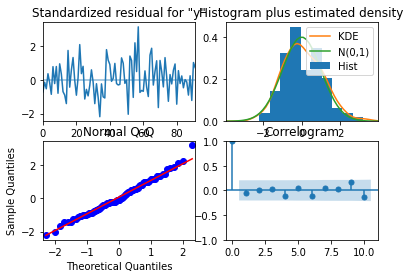

In [155]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using automated SARIMA (Seasonality=12) model and evaluate the model.

In [156]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [157]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,55.235177,13.907798,27.976394,82.493961
1,68.123048,13.991243,40.700716,95.545380
2,67.908690,14.012295,40.445097,95.372283
3,66.786179,14.099601,39.151469,94.420890
4,69.760071,14.108960,42.107017,97.413125


In [158]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.899926886404177 
MAPE: 34.849205039609394


In [159]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])
resultsDf = pd.concat([resultsDf,resultsDf_13])

resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,15.631542,NaN,NaN
NaiveModel,78.039461,NaN,NaN
SimpleAverageModel,51.811351,NaN,NaN
2pointTrailingMovingAverage,11.401145,NaN,NaN
4pointTrailingMovingAverage,14.404177,NaN,NaN
6pointTrailingMovingAverage,14.617568,NaN,NaN
9pointTrailingMovingAverage,14.939436,NaN,NaN
"Alpha=0.098,SimpleExponentialSmoothing",35.221068,NaN,NaN
"Alpha=0.99,SES",35.221081,NaN,NaN
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531,NaN,NaN


## Q7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.


#### Building a version of the ARIMA model(manual) for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

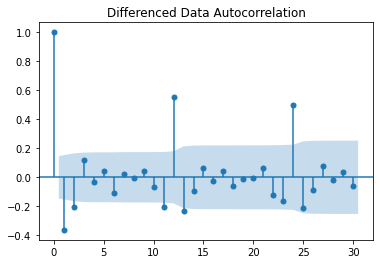

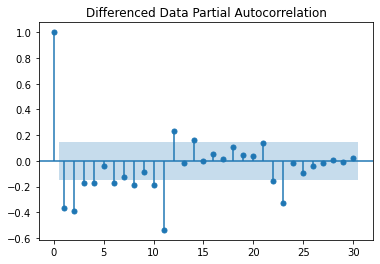

In [160]:
plot_acf(rdf['Rose'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(rdf['Rose'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

#### p=4, q=2, d= 1, SA= 6,12

In [161]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Sun, 23 May 2021   AIC                           1285.718
Time:                        09:13:22   BIC                           1305.845
Sample:                    01-31-1980   HQIC                          1293.896
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366      0.7

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


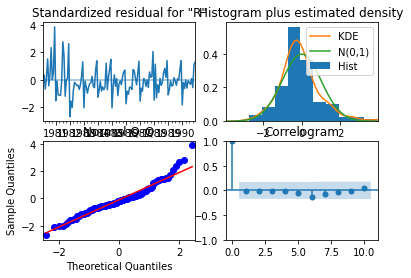

In [162]:
results_manual_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [163]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [164]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 35.47685509800646 
MAPE: 69.90091972007257


In [166]:
resultsDf_11 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(4,1,2)'])
resultsDf = pd.concat([resultsDf,resultsDf_11])
resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,15.631542,NaN,NaN
NaiveModel,78.039461,NaN,NaN
SimpleAverageModel,51.811351,NaN,NaN
2pointTrailingMovingAverage,11.401145,NaN,NaN
4pointTrailingMovingAverage,14.404177,NaN,NaN
6pointTrailingMovingAverage,14.617568,NaN,NaN
9pointTrailingMovingAverage,14.939436,NaN,NaN
"Alpha=0.098,SimpleExponentialSmoothing",35.221068,NaN,NaN
"Alpha=0.99,SES",35.221081,NaN,NaN
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531,NaN,NaN


### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

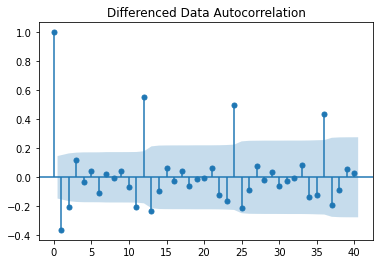

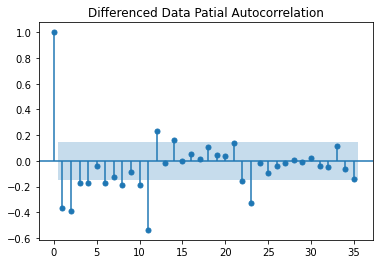

In [167]:
plot_acf(rdf['Rose'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plot_pacf(rdf['Rose'].diff().dropna(),lags=35,title='Differenced Data Patial Autocorrelation')
plt.show()

#### IDENTIFYING P AND Q FOR SEASONAL ARIMA

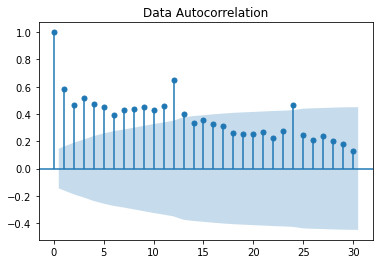

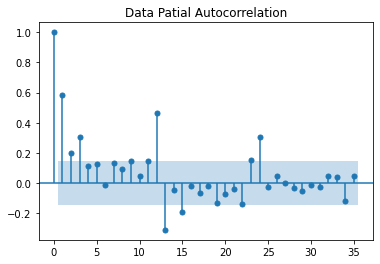

In [168]:
plot_acf(rdf['Rose'],lags=30,title='Data Autocorrelation')
plot_pacf(rdf['Rose'],lags=35,title='Data Patial Autocorrelation')
plt.show() #P=3 , Q= 1

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

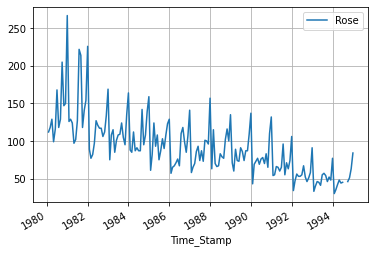

In [169]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

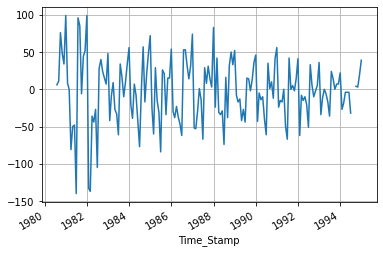

In [170]:
(df['Rose'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

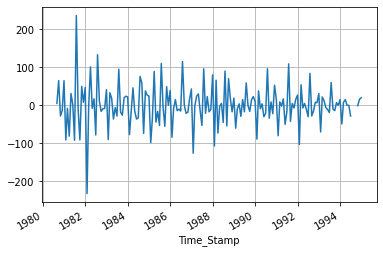

In [171]:
(df['Rose'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

#### CHECKINGT HE STATIONARITY OF TEST DATA

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

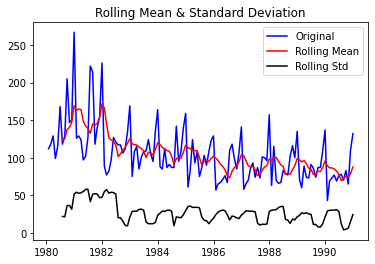

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [172]:
test_stationarity((train['Rose'].dropna()))

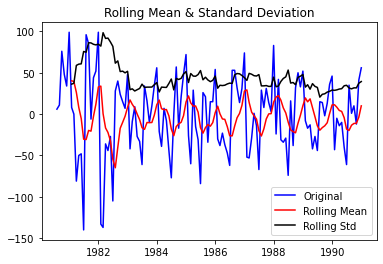

Results of Dickey-Fuller Test:
Test Statistic                -7.442449e+00
p-value                        5.956534e-11
#Lags Used                     7.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [173]:
test_stationarity((train['Rose'].diff(6).dropna()))

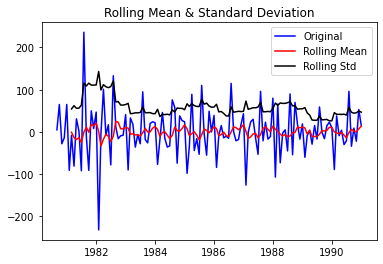

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [174]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

#### Checking the ACF and the PACF plots for the new modified Time Series.

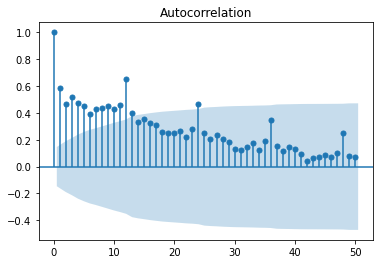

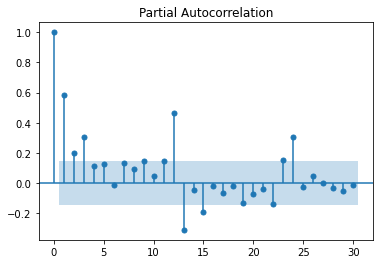

In [175]:
plot_acf(rdf['Rose'],lags=50)
plot_pacf(rdf['Rose'],lags=30)
plt.show()
        # To find P and Q P=3, Q=2, D=1 (stationary after differnecing once)

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [176]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(3, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(3, 1, [1], 6)   Log Likelihood                -441.711
Date:                             Sun, 23 May 2021   AIC                            905.422
Time:                                     09:19:39   BIC                            934.404
Sample:                                          0   HQIC                           917.161
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5257      0.384     -1.368      0.171      -1.279       0.227
ar.L2         -0.4576      

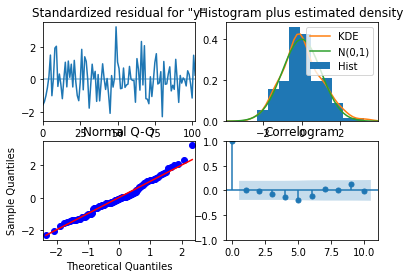

In [177]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

#### Predict on the Test Set using manual SARIMA model (Seasonality=6) and evaluate the model.

In [178]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [179]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,55.859744,17.632322,21.301028,90.418461
1,59.125127,18.728379,22.418180,95.832075
2,70.362802,19.187225,32.756531,107.969073
3,74.663549,19.421707,36.597703,112.729396
4,74.389621,20.075622,35.042125,113.737116


In [180]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 20.502326419086074 
MAPE: 35.09269855733627


In [181]:
resultsDf_14 = pd.DataFrame({'Test RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(4,1,2)(3,1,1,6)'])


resultsDf = pd.concat([resultsDf,resultsDf_14])

resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,15.631542,NaN,NaN
NaiveModel,78.039461,NaN,NaN
SimpleAverageModel,51.811351,NaN,NaN
2pointTrailingMovingAverage,11.401145,NaN,NaN
4pointTrailingMovingAverage,14.404177,NaN,NaN
6pointTrailingMovingAverage,14.617568,NaN,NaN
9pointTrailingMovingAverage,14.939436,NaN,NaN
"Alpha=0.098,SimpleExponentialSmoothing",35.221068,NaN,NaN
"Alpha=0.99,SES",35.221081,NaN,NaN
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531,NaN,NaN


#### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

Let us look at the ACF and the PACF plots once more.

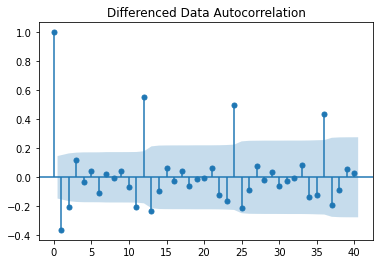

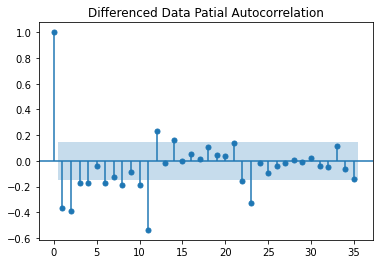

In [182]:
plot_acf(rdf['Rose'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plot_pacf(rdf['Rose'].diff().dropna(),lags=35,title='Differenced Data Patial Autocorrelation')
plt.show()   
# p = 4, d=1, q= 2 and S = 6,12

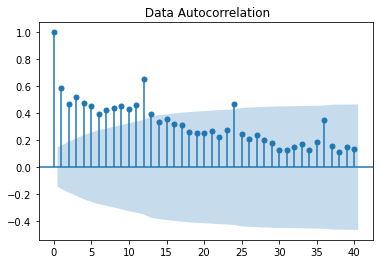

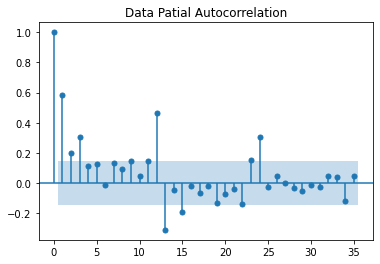

In [183]:
plot_acf(rdf['Rose'],lags=40,title=' Data Autocorrelation')
plot_pacf(rdf['Rose'],lags=35,title='Data Patial Autocorrelation')
plt.show() # to find P and Q P=3, Q=1

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

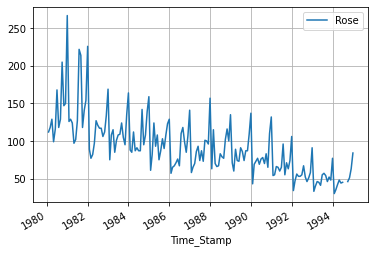

In [184]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

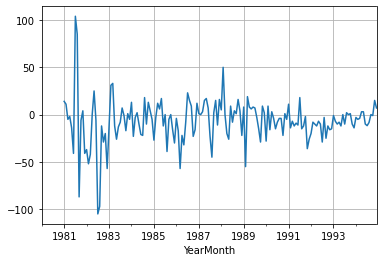

In [185]:
(rdf['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

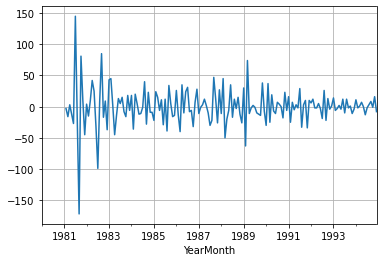

In [186]:
(rdf['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

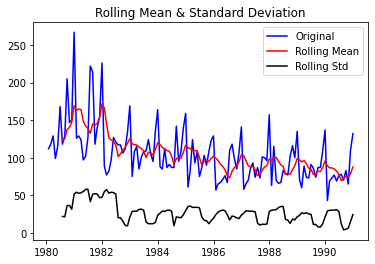

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [187]:
test_stationarity((train['Rose'].dropna()))

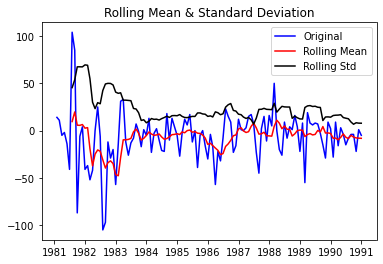

Results of Dickey-Fuller Test:
Test Statistic                  -3.619482
p-value                          0.005399
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [188]:
test_stationarity((train['Rose'].diff(12).dropna()))

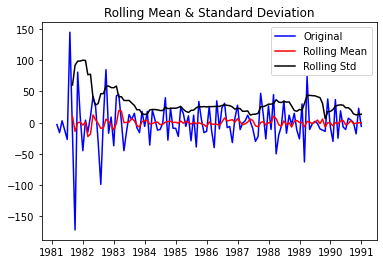

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [189]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

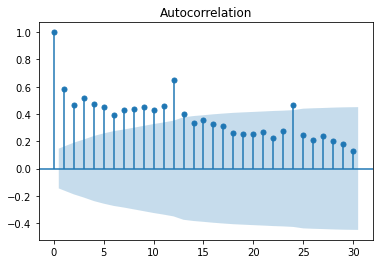

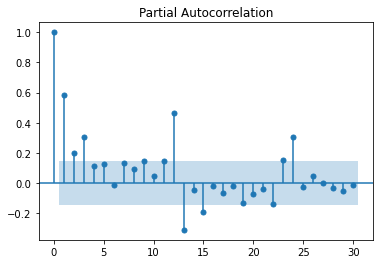

In [190]:
plot_acf(rdf['Rose'],lags=30)
plot_pacf(rdf['Rose'],lags=30)
plt.show()
        # To find P and Q P=3, Q=1, D=1

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [191]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -326.010
Date:                              Sun, 23 May 2021   AIC                            674.020
Time:                                      09:20:10   BIC                            700.084
Sample:                                           0   HQIC                           684.462
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8709      0.187     -4.652      0.000      -1.238      -0.504
ar.L2         -0.05

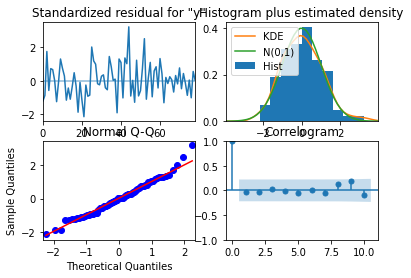

In [192]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

#### Predict on the Test Set using this model and evaluate the model.

In [193]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [194]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.383727,14.155367,16.639718,72.127736
1,65.062931,14.237251,37.158432,92.967430
2,65.865662,14.208773,38.016979,93.714345
3,63.658324,14.215386,35.796680,91.519968
4,66.187449,14.216943,38.322752,94.052145


In [195]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 17.330694508536265 
MAPE: 25.99452930737437


In [196]:
resultsDf_15 = pd.DataFrame({'Test RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(4,1,2)(3,1,1,12)'])

resultsDf = pd.concat([resultsDf,resultsDf_15])

resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,15.631542,NaN,NaN
NaiveModel,78.039461,NaN,NaN
SimpleAverageModel,51.811351,NaN,NaN
2pointTrailingMovingAverage,11.401145,NaN,NaN
4pointTrailingMovingAverage,14.404177,NaN,NaN
6pointTrailingMovingAverage,14.617568,NaN,NaN
9pointTrailingMovingAverage,14.939436,NaN,NaN
"Alpha=0.098,SimpleExponentialSmoothing",35.221068,NaN,NaN
"Alpha=0.99,SES",35.221081,NaN,NaN
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531,NaN,NaN


This is where our model building exercise ends. The least RMSE model is considered the best for predicting the forecast.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

## Q8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [197]:
results_table_r= pd.concat([resultsDf_1, resultsDf_2, resultsDf_3, resultsDf_4,  resultsDf_5,  resultsDf_6,  resultsDf_7, 
                       resultsDf_8,  resultsDf_9,  resultsDf_10,  resultsDf_11,  resultsDf_12,  resultsDf_13,  resultsDf_14, 
                       resultsDf_15])


In [198]:
results_table_r

,RMSE,Test RMSE,MAPE
RegressionOnTime,15.631542,NaN,NaN
NaiveModel,78.039461,NaN,NaN
SimpleAverageModel,51.811351,NaN,NaN
2pointTrailingMovingAverage,11.401145,NaN,NaN
4pointTrailingMovingAverage,14.404177,NaN,NaN
6pointTrailingMovingAverage,14.617568,NaN,NaN
9pointTrailingMovingAverage,14.939436,NaN,NaN
"Alpha=0.098,SimpleExponentialSmoothing",35.221068,NaN,NaN
"Alpha=0.99,SES",35.221081,NaN,NaN
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531,NaN,NaN


## Q9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

### Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [199]:
full_data_model = sm.tsa.statespace.SARIMAX(rdf['Rose'],
                                order=(4,1,2),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

## Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  180
Model:             SARIMAX(4, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -508.910
Date:                              Sun, 23 May 2021   AIC                           1039.820
Time:                                      09:20:48   BIC                           1071.106
Sample:                                  01-31-1980   HQIC                          1052.531
                                       - 12-31-1994                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8976      0.115     -7.778      0.000      -1.124      -0.671
ar.L2          0.04

In [200]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [201]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-01-31,18.853330,12.855152,-6.342304,44.048965
1995-02-28,28.491871,13.080877,2.853823,54.129920
1995-03-31,35.899689,13.116819,10.191197,61.608180
1995-04-30,35.934404,13.155075,10.150930,61.717878
1995-05-31,34.307495,13.153839,8.526444,60.088545


In [202]:
rmse = mean_squared_error(rdf['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 40.170769509337184


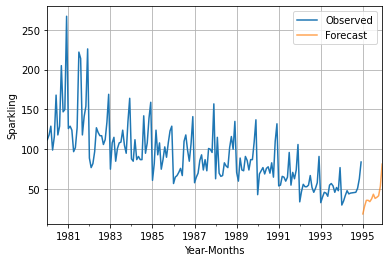

In [203]:
axis = rdf['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [204]:
full_data_model = sm.tsa.statespace.SARIMAX(rdf['Rose'],
                                order=(3,1,1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  180
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -555.082
Date:                                 Sun, 23 May 2021   AIC                           1130.165
Time:                                         09:20:56   BIC                           1159.581
Sample:                                     01-31-1980   HQIC                          1142.119
                                          - 12-31-1994                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0414      0.096      0.431      0.667      -0.147       0

###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

#### Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [205]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [206]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-01-31,26.804534,12.295695,2.705415,50.903654
1995-02-28,33.881776,12.461695,9.457303,58.306249
1995-03-31,39.201539,12.553341,14.597443,63.805634
1995-04-30,39.275004,12.558696,14.660412,63.889596
1995-05-31,39.732045,12.613102,15.010819,64.453271


In [207]:
rmse = mean_squared_error(rdf['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 31.857079245771136


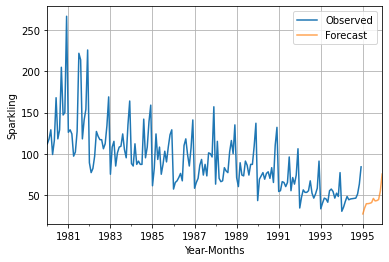

In [208]:
axis = rdf['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [209]:
full_data_model = sm.tsa.statespace.SARIMAX(rdf['Rose'],
                                order=(4,1,2),
                                seasonal_order=(3, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                Rose   No. Observations:                  180
Model:             SARIMAX(4, 1, 2)x(3, 1, [1], 6)   Log Likelihood                -622.286
Date:                             Sun, 23 May 2021   AIC                           1266.572
Time:                                     09:21:07   BIC                           1299.762
Sample:                                 01-31-1980   HQIC                          1280.056
                                      - 12-31-1994                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0496      0.113      0.440      0.660      -0.171       0.271
ar.L2         -0.0558      

#### Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [210]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [211]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-01-31,31.998549,14.909584,2.776300,61.220798
1995-02-28,34.680573,15.376994,4.542219,64.818927
1995-03-31,40.555826,15.513183,10.150545,70.961106
1995-04-30,46.012651,15.525422,15.583382,76.441920
1995-05-31,43.651235,15.610482,13.055253,74.247218


In [212]:
rmse = mean_squared_error(rdf['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 30.30506072554515


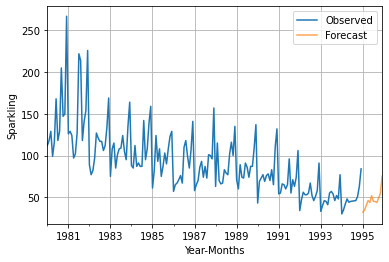

In [213]:
axis = rdf['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

## Q10.  Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [214]:
results_table_r

,RMSE,Test RMSE,MAPE
RegressionOnTime,15.631542,NaN,NaN
NaiveModel,78.039461,NaN,NaN
SimpleAverageModel,51.811351,NaN,NaN
2pointTrailingMovingAverage,11.401145,NaN,NaN
4pointTrailingMovingAverage,14.404177,NaN,NaN
6pointTrailingMovingAverage,14.617568,NaN,NaN
9pointTrailingMovingAverage,14.939436,NaN,NaN
"Alpha=0.098,SimpleExponentialSmoothing",35.221068,NaN,NaN
"Alpha=0.99,SES",35.221081,NaN,NaN
"Alpha= 1.4901e-08,Beta=1.661e-10:DES",15.631531,NaN,NaN


#### RMSE values of SARIMA models for the entire dataset considering least RMSE in the dataset are summarised as:

SARIMA(4,1,2) (3,1,1,12) - RMSE = 40.171
SARIMA(3,1,1)(3,0,2,12) - RMSE = 31.857
SARIMA(4,1,2) (3,1,1,6) - RMSE = 30.305

#### For the test data, RMSE observed is
RMSE values computed for SARIMA models for test data are:
SARIMA(4,1,2) (3,1,1,12) - RMSE = 17.33
SARIMA(3,1,1)(3,0,2,12) - RMSE = 18.89
SARIMA(4,1,2) (3,1,1,6) - RMSE = 20.502


The best model based on RMSE is 
##### SARIMA(4,1,2)(3,1,1,12)
as it has least RMSE among the ARIMA/SARIMA models designed for test data.

For the whole dataset, we can observe that 
###### SARIMA(4,1,2) (3,1,1,6) 
has the least RMSE among the entire dataset.
 
Based on MAPE values, the best ARIMA model is ARIMA(2,1,3) with MAPE 69.374
and the best SARIMA model based on MAPE is SARIMA(4,1,2)(3,1,1,12).

Hence, it is concluded that best model is SARIMA(4,1,2)(3,1,1,12) based on the observations from the table.

From the above table and Qn9, it is observed that the least RMSE is for the model:
#### Alpha=0.0887,Beta=9.00642e-06,Gamma=0.000302:TES

The plots of output curves for Alpha=0.0887,Beta=9.00642e-06,Gamma=0.000302:TES and SARIMA(2,1,3)(2,0,3,6) are plotted.


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08872764725999983, 'smoothing_trend': 9.006425383910208e-06, 'smoothing_seasonal': 0.00030220468692033857, 'damping_trend': nan, 'initial_level': 146.86313344217183, 'initial_trend': -0.54920783338383, 'initial_seasons': array([-31.29615978, -18.85729122, -10.84129035, -21.39327001,
       -12.61174453,  -7.17892692,   2.72463253,   8.78522404,
         4.87498352,   3.01144155,  21.09509348,  63.26062685]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
TES RMSE: 14.255505858895798


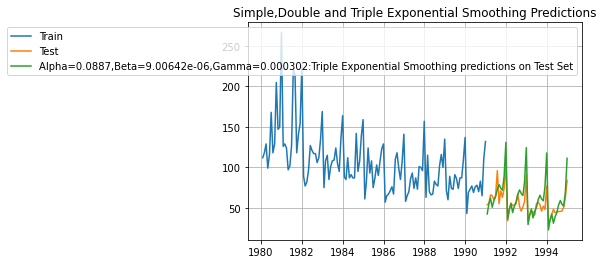

In [215]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Alpha=0.0887,Beta=9.00642e-06,Gamma=0.000302:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(3, 1, [1], 6)   Log Likelihood                -441.711
Date:                             Sun, 23 May 2021   AIC                            905.422
Time:                                     09:29:45   BIC                            934.404
Sample:                                          0   HQIC                           917.161
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5257      0.384     -1.368      0.171      -1.279       0.227
ar.L2         -0.4576      

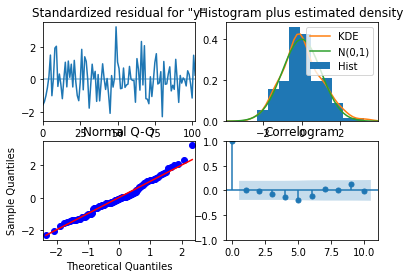

In [218]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(3, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

results_manual_SARIMA_12.plot_diagnostics()
plt.show()

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -326.010
Date:                              Sun, 23 May 2021   AIC                            674.020
Time:                                      09:29:59   BIC                            700.084
Sample:                                           0   HQIC                           684.462
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8709      0.187     -4.652      0.000      -1.238      -0.504
ar.L2         -0.05

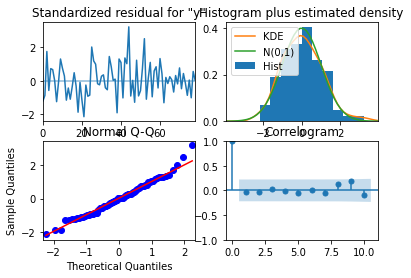

In [219]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

results_manual_SARIMA_12.plot_diagnostics()
plt.show()